In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch
from torch.utils.data import random_split
%matplotlib inline

In [2]:
# data_df = pd.read_pickle('data_df_2015-2020-18-endpoints-4-cols.pickle')
# games_df = pd.read_pickle('games_df_2015-2020.pickle')
data_df = pd.read_csv('18-endpoints-4-cols.csv', index_col=[0,1])
games_df = pd.read_csv('games_df_2015-2020.csv')
games_df.drop(columns='Unnamed: 0', inplace=True)

In [3]:
data_df.head()

opponent-points-per-game-col=2  \
2014-11-04 Atlanta                             100.5   
           Boston                              109.0   
           Brooklyn                             98.7   
           Charlotte                            91.0   
           Chicago                              99.7   

                      opponent-points-per-game-col=3  \
2014-11-04 Atlanta                             100.5   
           Boston                              109.0   
           Brooklyn                             98.7   
           Charlotte                            91.0   
           Chicago                              99.7   

                      opponent-points-per-game-col=5  \
2014-11-04 Atlanta                              92.0   
           Boston                              105.0   
           Brooklyn                             85.0   
           Charlotte                            88.5   
           Chicago                             114.0   

                      opponent-points-per-game-col=6  points-per-game-col=2  \
2014-11-04 Atlanta                             109.0                  102.0   
           Boston                              111.0                  108.0   
           Brooklyn                            105.5                  107.7   
           Charlotte                            96.0                   90.0   
           Chicago                              92.5                  106.0   

                      points-per-game-col=3  points-per-game-col=5  \
2014-11-04 Atlanta                    102.0                  102.0   
           Boston                     108.0                  121.0   
           Brooklyn                   107.7                  116.0   
           Charlotte                   90.0                   88.5   
           Chicago                    106.0                  108.0   

                      points-per-game-col=6  true-shooting-percentage-col=2  \
2014-11-04 Atlanta                    102.0                           118.1   
           Boston                     101.5                           102.8   
           Brooklyn                   103.5                           116.0   
           Charlotte                   93.0                            96.7   
           Chicago                    105.0                           117.2   

                      true-shooting-percentage-col=3  ...  \
2014-11-04 Atlanta                             118.1  ...   
           Boston                              102.8  ...   
           Brooklyn                            116.0  ...   
           Charlotte                            96.7  ...   
           Chicago                             117.2  ...   

                      defensive-rebounding-pct-col=5  \
2014-11-04 Atlanta                              75.6   
           Boston                               74.3   
           Brooklyn                             68.8   
           Charlotte                            86.0   
           Chicago                              60.8   

                      defensive-rebounding-pct-col=6  \
2014-11-04 Atlanta                              66.7   
           Boston                               77.0   
           Brooklyn                             77.6   
           Charlotte                            78.9   
           Chicago                              72.2   

                      offensive-rebounding-pct-col=2  \
2014-11-04 Atlanta                              16.7   
           Boston                               31.5   
           Brooklyn                             25.9   
           Charlotte                            22.8   
           Chicago                              23.4   

                      offensive-rebounding-pct-col=3  \
2014-11-04 Atlanta                              16.7   
           Boston                               31.5   
           Brooklyn                             25.9   
           Charlotte                  

In [3]:
# Remove data_df values/rows if no game played by that team on day
data_df['Won'] = None
i = 0
for ind in data_df.index:
    if ((games_df['Date'] == ind[0]) & (games_df['Home'] == ind[1])).any():
        won = int(games_df.loc[(games_df['Date'] == ind[0]) & (games_df['Home'] == ind[1]), 'DidHomeWin'].item())
        data_df.loc[(ind[0], ind[1]), 'Won'] = won
    elif ((games_df['Date'] == ind[0]) & (games_df['Away'] == ind[1])).any():
        won = int(not games_df.loc[(games_df['Date'] == ind[0]) & (games_df['Away'] == ind[1]), 'DidHomeWin'].item())
        data_df.loc[(ind[0], ind[1]), 'Won'] = won
    else:
        data_df.drop((ind[0], ind[1]), axis='index')

In [22]:
int(games_df.loc[(games_df['Date'] == '2014-11-01') & (games_df['Home'] == 'Charlotte'), 'DidHomeWin'].item())

0

In [4]:
data_df.head()

opponent-points-per-game-col=2  \
2014-11-04 Atlanta                             100.5   
           Boston                              109.0   
           Brooklyn                             98.7   
           Charlotte                            91.0   
           Chicago                              99.7   

                      opponent-points-per-game-col=3  \
2014-11-04 Atlanta                             100.5   
           Boston                              109.0   
           Brooklyn                             98.7   
           Charlotte                            91.0   
           Chicago                              99.7   

                      opponent-points-per-game-col=5  \
2014-11-04 Atlanta                              92.0   
           Boston                              105.0   
           Brooklyn                             85.0   
           Charlotte                            88.5   
           Chicago                             114.0   

                      opponent-points-per-game-col=6  points-per-game-col=2  \
2014-11-04 Atlanta                             109.0                  102.0   
           Boston                              111.0                  108.0   
           Brooklyn                            105.5                  107.7   
           Charlotte                            96.0                   90.0   
           Chicago                              92.5                  106.0   

                      points-per-game-col=3  points-per-game-col=5  \
2014-11-04 Atlanta                    102.0                  102.0   
           Boston                     108.0                  121.0   
           Brooklyn                   107.7                  116.0   
           Charlotte                   90.0                   88.5   
           Chicago                    106.0                  108.0   

                      points-per-game-col=6  true-shooting-percentage-col=2  \
2014-11-04 Atlanta                    102.0                           118.1   
           Boston                     101.5                           102.8   
           Brooklyn                   103.5                           116.0   
           Charlotte                   93.0                            96.7   
           Chicago                    105.0                           117.2   

                      true-shooting-percentage-col=3  ...  \
2014-11-04 Atlanta                             118.1  ...   
           Boston                              102.8  ...   
           Brooklyn                            116.0  ...   
           Charlotte                            96.7  ...   
           Chicago                             117.2  ...   

                      defensive-rebounding-pct-col=6  \
2014-11-04 Atlanta                              66.7   
           Boston                               77.0   
           Brooklyn                             77.6   
           Charlotte                            78.9   
           Chicago                              72.2   

                      offensive-rebounding-pct-col=2  \
2014-11-04 Atlanta                              16.7   
           Boston                               31.5   
           Brooklyn                             25.9   
           Charlotte                            22.8   
           Chicago                              23.4   

                      offensive-rebounding-pct-col=3  \
2014-11-04 Atlanta                              16.7   
           Boston                               31.5   
           Brooklyn                             25.9   
           Charlotte                            22.8   
           Chicago                              23.4   

                      offensive-rebounding-pct-col=5  \
2014-11-04 Atlanta                               8.3   
           Boston                               23.1   
           Brooklyn                             23.7   
           Charlotte                  

In [30]:
data_df.describe()

,opponent-points-per-game-col=2,opponent-points-per-game-col=3,opponent-points-per-game-col=5,opponent-points-per-game-col=6,points-per-game-col=2,points-per-game-col=3,points-per-game-col=5,points-per-game-col=6,true-shooting-percentage-col=2,true-shooting-percentage-col=3,...,defensive-rebounding-pct-col=5,defensive-rebounding-pct-col=6,offensive-rebounding-pct-col=2,offensive-rebounding-pct-col=3,offensive-rebounding-pct-col=5,offensive-rebounding-pct-col=6,win-pct-all-games-col=2,win-pct-all-games-col=3,win-pct-all-games-col=5,win-pct-all-games-col=6
count,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,...,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000
mean,104.503873,105.210054,103.325239,105.722405,104.510727,105.180366,105.712673,103.293231,108.379000,109.017590,...,76.986006,75.969112,23.537747,23.375547,24.049460,23.021437,0.499993,0.499440,0.575466,0.421838
std,5.543125,8.532674,5.920390,6.047800,5.917554,8.756340,6.541188,6.201603,4.418069,7.677806,...,2.757595,2.681991,2.744970,4.733971,3.192981,2.943629,0.171918,0.311174,0.199206,0.192158
min,85.000000,75.000000,75.000000,72.000000,86.700000,74.700000,78.000000,81.000000,90.000000,82.400000,...,56.200000,60.600000,13.500000,6.100000,8.300000,7.500000,0.000000,0.000000,0.000000,0.000000
25%,100.325000,99.300000,98.900000,101.600000,100.800000,99.000000,101.600000,99.000000,105.700000,103.800000,...,75.500000,74.300000,21.600000,20.000000,21.800000,21.100000,0.385000,0.333000,0.438000,0.286000
50%,104.400000,105.000000,103.100000,105.500000,104.000000,105.000000,105.300000,103.000000,108.200000,108.800000,...,77.000000,75.900000,23.500000,23.200000,23.900000,22.800000,0.500000,0.333000,0.600000,0.417000
75%,108.200000,111.000000,107.200000,109.600000,108.200000,111.300000,109.900000,107.300000,111.300000,114.100000,...,78.600000,77.800000,25.400000,26.500000,26.300000,24.800000,0.611000,0.667000,0.714000,0.538000
max,123.900000,138.700000,129.000000,132.000000,125.000000,138.300000,127.000000,125.800000,127.100000,135.800000,...,95.700000,91.700000,35.200000,42.000000,37.500000,45.200000,1.000000,1.000000,1.000000,1.000000


In [21]:
data_df.columns

Index(['opponent-points-per-game-col=2', 'opponent-points-per-game-col=3',
       'opponent-points-per-game-col=5', 'opponent-points-per-game-col=6',
       'points-per-game-col=2', 'points-per-game-col=3',
       'points-per-game-col=5', 'points-per-game-col=6',
       'true-shooting-percentage-col=2', 'true-shooting-percentage-col=3',
       'true-shooting-percentage-col=5', 'true-shooting-percentage-col=6',
       'opponent-true-shooting-percentage-col=2',
       'opponent-true-shooting-percentage-col=3',
       'opponent-true-shooting-percentage-col=5',
       'opponent-true-shooting-percentage-col=6', 'assists-per-game-col=2',
       'assists-per-game-col=3', 'assists-per-game-col=5',
       'assists-per-game-col=6', 'assists-per-possession-col=2',
       'assists-per-possession-col=3', 'assists-per-possession-col=5',
       'assists-per-possession-col=6', 'assist--per--turnover-ratio-col=2',
       'assist--per--turnover-ratio-col=3',
       'assist--per--turnover-ratio-col=5',
 

In [31]:
data_df.corr()

,opponent-points-per-game-col=2,opponent-points-per-game-col=3,opponent-points-per-game-col=5,opponent-points-per-game-col=6,points-per-game-col=2,points-per-game-col=3,points-per-game-col=5,points-per-game-col=6,true-shooting-percentage-col=2,true-shooting-percentage-col=3,...,defensive-rebounding-pct-col=5,defensive-rebounding-pct-col=6,offensive-rebounding-pct-col=2,offensive-rebounding-pct-col=3,offensive-rebounding-pct-col=5,offensive-rebounding-pct-col=6,win-pct-all-games-col=2,win-pct-all-games-col=3,win-pct-all-games-col=5,win-pct-all-games-col=6
opponent-points-per-game-col=2,1.000000,0.642962,0.922497,0.923380,0.585012,0.381681,0.539880,0.549621,0.249421,0.144521,...,-0.008341,-0.036078,-0.165602,-0.108657,-0.138344,-0.151520,-0.366667,-0.214917,-0.278044,-0.357120
opponent-points-per-game-col=3,0.642962,1.000000,0.579598,0.602286,0.389630,0.468931,0.352427,0.371458,0.167179,0.183635,...,0.017400,-0.004350,-0.093081,-0.074355,-0.080626,-0.084107,-0.218567,-0.417453,-0.157387,-0.216978
opponent-points-per-game-col=5,0.922497,0.579598,1.000000,0.716238,0.527218,0.345391,0.541531,0.440308,0.228244,0.134926,...,-0.032776,0.003660,-0.179044,-0.111875,-0.148956,-0.161629,-0.347382,-0.188598,-0.348040,-0.260365
opponent-points-per-game-col=6,0.923380,0.602286,0.716238,1.000000,0.555261,0.359557,0.460510,0.580739,0.233767,0.133935,...,0.011560,-0.071882,-0.131147,-0.090083,-0.109275,-0.124688,-0.326139,-0.204759,-0.173033,-0.403530
points-per-game-col=2,0.585012,0.389630,0.527218,0.555261,1.000000,0.665988,0.932724,0.922000,0.801683,0.463683,...,0.103945,0.107609,-0.022140,-0.049484,0.019448,-0.059172,0.482171,0.252557,0.476750,0.367014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
offensive-rebounding-pct-col=6,-0.151520,-0.084107,-0.161629,-0.124688,-0.059172,-0.037291,-0.057036,-0.052833,-0.211843,-0.107202,...,-0.072967,-0.189340,0.880698,0.487709,0.613116,1.000000,0.045950,0.029950,0.026977,0.061145
win-pct-all-games-col=2,-0.366667,-0.218567,-0.347382,-0.326139,0.482171,0.333677,0.444306,0.444751,0.625469,0.361371,...,0.059019,0.142498,0.102352,0.038352,0.127873,0.045950,1.000000,0.549636,0.876655,0.867565
win-pct-all-games-col=3,-0.214917,-0.417453,-0.188598,-0.204759,0.252557,0.445435,0.244770,0.220081,0.342161,0.503786,...,0.056140,0.094245,0.061609,0.102701,0.075425,0.029950,0.549636,1.000000,0.477869,0.475671
win-pct-all-games-col=5,-0.278044,-0.157387,-0.348040,-0.173033,0.476750,0.328593,0.506887,0.372677,0.569255,0.327993,...,0.095369,0.141073,0.104474,0.040496,0.146994,0.026977,0.876655,0.477869,1.000000,0.541791


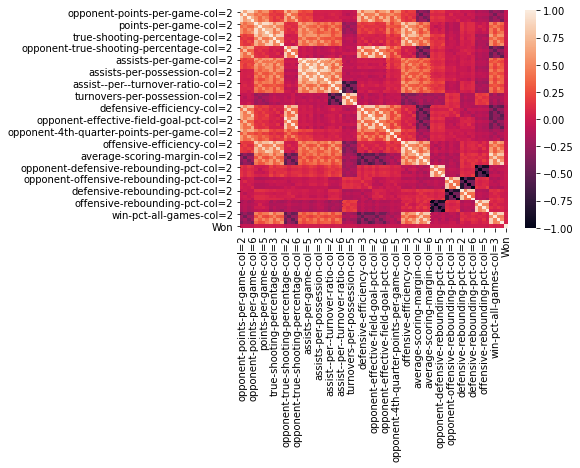

In [27]:
sns.heatmap(data_df.corr())